In [111]:
import pandas as pd
import polars as pl
import datetime
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, ConfusionMatrixDisplay
pl.Config.set_fmt_str_lengths(100)

polars.config.Config

In [81]:
from processing.processing import get_df, make_X_y

In [ ]:
class RamModel():
    def __init__(self) -> None:
        
        

In [84]:
df = get_df("ELS_data_T55.csv",datetime.time(21,25),datetime.time(21,30))
X,y = make_X_y(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [85]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight="balanced"))

In [86]:
pipe.fit(X_train.drop(columns="Time"),y_train)
y_pred = pipe.predict(X_test.drop(columns="Time"))
f1_score(y_test,y_pred)

0.9752808988764045

In [112]:
def join_y(y_test: pd.Series, y_pred: np.ndarray) -> pd.DataFrame: 
    joint_y = y_test.to_frame()
    joint_y["predicted"] = y_pred
    return joint_y

In [113]:
joint_y = join_y(y_test,y_pred)

In [104]:
wrong_preds = joint_y.query("Rammed != predicted")

In [130]:
import warnings

In [140]:
warnings.warn("test")

C:\Users\richa\AppData\Local\Temp\ipykernel_7920\675121762.py:1: UserWarning: test
  warnings.warn("test")


In [139]:
w

In [134]:
dir(w)

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [115]:
X_test[["Time"]].join(wrong_preds,how="right")

,Time,Rammed,predicted
2833,2009-05-21 21:23:29.302,0,1
2826,2009-05-21 21:23:15.302,0,1
2867,2009-05-21 21:24:37.302,0,1
2822,2009-05-21 21:23:07.302,0,1
2819,2009-05-21 21:23:01.302,0,1
2851,2009-05-21 21:24:05.302,0,1
2801,2009-05-21 21:22:25.303,0,1
2765,2009-05-21 21:21:13.303,0,1
2862,2009-05-21 21:24:27.302,0,1
2809,2009-05-21 21:22:41.302,0,1


In [117]:
from sklearn import preprocessing

In [126]:
X_test.iloc[:,:63]

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
3365,5760.000000,2432.000000,1493.333374,1109.333374,1536.000000,2090.666748,1280.000000,1280.000000,1280.000000,1493.333374,...,0.000000,42.666668,85.333336,0.000000,0.000000,128.000000,0.000000,42.666668,42.666668,42.666668
1945,8704.000000,7594.666504,4224.000000,938.666687,938.666687,853.333313,896.000000,768.000000,981.333313,853.333313,...,0.000000,0.000000,85.333336,42.666668,85.333336,0.000000,85.333336,0.000000,42.666668,42.666668
5335,2869.333252,3061.333252,2773.333252,2869.333252,2869.333252,1493.333374,458.666656,245.333328,160.000000,202.666672,...,74.666664,42.666668,10.666667,42.666668,53.333332,10.666667,21.333334,42.666668,53.333332,53.333332
4245,10325.333008,8704.000000,6613.333496,1194.666626,384.000000,42.666668,170.666672,170.666672,42.666668,256.000000,...,85.333336,42.666668,128.000000,85.333336,42.666668,42.666668,85.333336,85.333336,42.666668,0.000000
168,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,58.666668,48.000000,37.333332,53.333332,26.666666,48.000000,37.333332,48.000000,26.666666,26.666666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,65535.000000,...,448.000000,261.333344,181.333328,176.000000,96.000000,74.666664,64.000000,58.666668,48.000000,42.666668
4523,8938.666992,8341.333008,5738.666504,2602.666748,597.333313,277.333344,341.333344,213.333328,426.666656,320.000000,...,42.666668,85.333336,42.666668,42.666668,106.666664,0.000000,64.000000,21.333334,0.000000,21.333334
1595,7040.000000,5162.666504,2986.666748,1472.000000,1258.666626,1002.666687,1216.000000,1301.333374,1002.666687,1472.000000,...,85.333336,64.000000,42.666668,64.000000,21.333334,21.333334,85.333336,64.000000,42.666668,85.333336
4320,8704.000000,9642.666992,6613.333496,1578.666626,213.333328,384.000000,426.666656,341.333344,426.666656,256.000000,...,0.000000,0.000000,0.000000,0.000000,85.333336,0.000000,42.666668,42.666668,0.000000,0.000000


In [124]:
X_test.loc[:,"Time"]

3365   2009-05-21 21:41:13.294
1945   2009-05-21 20:53:53.315
5335   2009-05-21 23:59:46.236
4245   2009-05-21 22:12:09.281
168    2009-05-21 18:22:50.379
                 ...          
4774   2009-05-21 22:44:58.267
4523   2009-05-21 22:28:04.275
1595   2009-05-21 20:39:16.321
4320   2009-05-21 22:14:39.280
3390   2009-05-21 21:42:03.294
Name: Time, Length: 1335, dtype: datetime64[ns]

In [128]:
X_test.iloc[:,:63] = preprocessing.StandardScaler().fit_transform(X_test.iloc[:,:63])

In [129]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Time
3365,-0.534306,-0.637001,-0.606253,-0.548368,-0.511091,-0.484691,-0.501445,-0.493287,-0.489587,-0.478628,...,-0.087845,-0.078129,-0.092682,-0.092042,-0.067230,-0.090351,-0.082228,-0.082066,-0.081895,2009-05-21 21:41:13.294
1945,-0.406817,-0.416366,-0.492384,-0.555291,-0.534990,-0.533995,-0.516758,-0.513653,-0.501454,-0.504043,...,-0.095808,-0.078129,-0.084720,-0.076118,-0.091115,-0.074428,-0.090189,-0.082066,-0.081895,2009-05-21 20:53:53.315
5335,-0.659485,-0.610106,-0.552877,-0.476968,-0.457746,-0.508493,-0.534197,-0.534443,-0.534090,-0.529882,...,-0.087845,-0.092064,-0.084720,-0.082089,-0.089125,-0.086370,-0.082228,-0.080076,-0.079905,2009-05-21 23:59:46.236
4245,-0.336606,-0.368957,-0.392748,-0.544906,-0.557182,-0.566298,-0.545682,-0.537413,-0.538752,-0.527764,...,-0.087845,-0.070166,-0.076757,-0.084080,-0.083154,-0.074428,-0.074267,-0.082066,-0.089856,2009-05-21 22:12:09.281
168,2.054225,2.059810,2.064291,2.065243,2.049435,2.043376,2.060884,2.062585,2.063553,2.064538,...,-0.086850,-0.087087,-0.082729,-0.087066,-0.082159,-0.083385,-0.081233,-0.085052,-0.084880,2009-05-21 18:22:50.379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774,2.054225,2.059810,2.064291,2.065243,2.049435,2.043376,2.060884,2.062585,2.063553,2.064538,...,-0.047036,-0.060213,-0.059837,-0.074127,-0.077183,-0.078409,-0.079243,-0.081071,-0.081895,2009-05-21 22:44:58.267
4523,-0.396655,-0.384456,-0.429222,-0.487786,-0.548646,-0.556947,-0.538876,-0.535716,-0.523494,-0.525222,...,-0.079883,-0.086092,-0.084720,-0.072137,-0.091115,-0.078409,-0.086209,-0.090027,-0.085875,2009-05-21 22:28:04.275
1595,-0.478876,-0.520302,-0.543981,-0.533655,-0.522187,-0.528045,-0.503997,-0.492438,-0.500607,-0.479475,...,-0.083864,-0.086092,-0.080738,-0.088061,-0.087135,-0.074428,-0.078248,-0.082066,-0.073934,2009-05-21 20:39:16.321
4320,-0.406817,-0.328842,-0.392748,-0.529328,-0.564010,-0.552697,-0.535474,-0.530624,-0.523494,-0.527764,...,-0.095808,-0.094055,-0.092682,-0.076118,-0.091115,-0.082389,-0.082228,-0.090027,-0.089856,2009-05-21 22:14:39.280


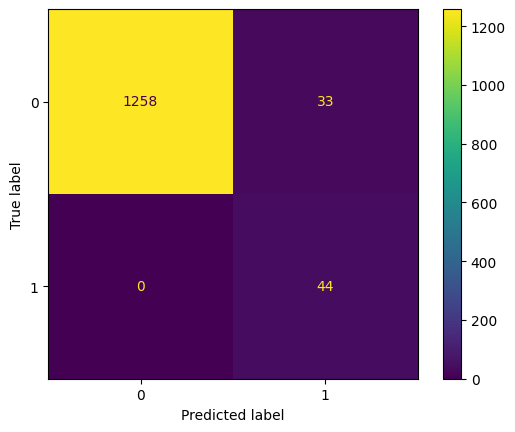

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [62]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])